# 0. Load File

In [ ]:
import pandas as pd

# Define your data
vehicles = [
    {'brand': 'seat', 'segment':'C', 'body_type': 'Hatchback', 'fuelType': 'diesel', 'cv': 120},
    {'brand': 'seat', 'segment':'C', 'body_type': 'Hatchback', 'fuelType': 'gasolina', 'cv': 120},
    {'brand': 'seat', 'segment':'C', 'body_type': 'Hatchback', 'fuelType': 'hibrido', 'cv': 120},
    
    {'brand': 'vw', 'segment':'C', 'body_type': 'Hatchback', 'fuelType': 'diesel', 'cv': 120},
    {'brand': 'vw', 'segment':'C', 'body_type': 'Hatchback', 'fuelType': 'hibrido', 'cv': 120},
    {'brand': 'vw', 'segment':'C', 'body_type': 'Hatchback', 'fuelType': 'gasolina', 'cv': 120},
    
    {'brand': 'mazda', 'segment':'C', 'body_type': 'Sedan', 'fuelType': 'hibrido', 'cv': 120},
    {'brand': 'mazda', 'segment':'C', 'body_type': 'Sedan', 'fuelType': 'gasolina', 'cv': 120},
    
    {'brand': 'kia', 'segment':'C', 'body_type': 'Hatchback', 'fuelType': 'hibrido', 'cv': 120},
    {'brand': 'kia', 'segment':'C', 'body_type': 'Hatchback', 'fuelType': 'gasolina', 'cv': 120},
    
    {'brand': 'renault', 'segment':'C', 'body_type': 'Hatchback', 'fuelType': 'diesel', 'cv': 120},
    {'brand': 'renault', 'segment':'C', 'body_type': 'Hatchback', 'fuelType': 'gasolina', 'cv': 120},
    

    #{'brand': 'tesla', 'segment':'D', 'fuelType': 'electrico', 'cv': 200},
    #{'brand': 'audi', 'segment':'J', 'fuelType': 'gasolina', 'cv': 200},
    #{'brand': 'audi', 'segment':'J', 'fuelType': 'diesel', 'cv': 200}
]


# Generate data for each vehicle
data = []
for vehicle in vehicles:
    age = 0
    km = 0
    for _ in range(8):  # Generate 8 rows for each model
        data.append({
            'brand': vehicle['brand'],
            #'Model': vehicle['Model'],
            'segment': vehicle['segment'],
            'body_type': vehicle['body_type'],
            'fuelType': vehicle['fuelType'],
            'cv': vehicle['cv'],
            'age': age,
            'km': km
        })
        age += 1
        km += 15000

# Create DataFrame
df = pd.DataFrame(data)

print(df)


      brand segment  body_type  fuelType   cv  age      km
0      seat       C  Hatchback    diesel  120    0       0
1      seat       C  Hatchback    diesel  120    1   15000
2      seat       C  Hatchback    diesel  120    2   30000
3      seat       C  Hatchback    diesel  120    3   45000
4      seat       C  Hatchback    diesel  120    4   60000
..      ...     ...        ...       ...  ...  ...     ...
91  renault       C  Hatchback  gasolina  120    3   45000
92  renault       C  Hatchback  gasolina  120    4   60000
93  renault       C  Hatchback  gasolina  120    5   75000
94  renault       C  Hatchback  gasolina  120    6   90000
95  renault       C  Hatchback  gasolina  120    7  105000

[96 rows x 7 columns]


In [3]:
# df = df_auto[["km","fuelType","isProfessional","warrantyMonths","cv","age","brand","segment","price_calc"]]

# df['warrantyMonths'] = df['warrantyMonths'].astype(int)
# df['isProfessional'] = df['isProfessional'].astype(bool)


df.dtypes

brand        object
segment      object
body_type    object
fuelType     object
cv            int64
age           int64
km            int64
dtype: object

# Load Model

In [ ]:
from pycaret.regression import *

# load model
auto_model = load_model('../models/2026-01-06/auto_ml')
auto_model

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['km', 'cv', 'age'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['fuelType', 'brand', 'segment',
                                             'body_type'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('onehot_encoding',
                 TransformerWrapper(include=['fuelType', 'brand', 'segment',
                                             'body_type'],
                                    transformer=OneHotEncoder(cols=['fuelType',
                                                                    'brand',
                                                                    'segment',
                                                                    'body_type'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('actual_estimator',
                 LGBMRegressor(n_jobs=-1, random_state=42))])

In [5]:
df_predictions = predict_model(auto_model, data=df)

df_predictions.head()

,brand,segment,body_type,fuelType,cv,age,km,prediction_label
0,seat,C,Hatchback,diesel,120,0,0,23397.498973
1,seat,C,Hatchback,diesel,120,1,15000,21355.896238
2,seat,C,Hatchback,diesel,120,2,30000,21024.514248
3,seat,C,Hatchback,diesel,120,3,45000,20861.311218
4,seat,C,Hatchback,diesel,120,4,60000,20171.891400


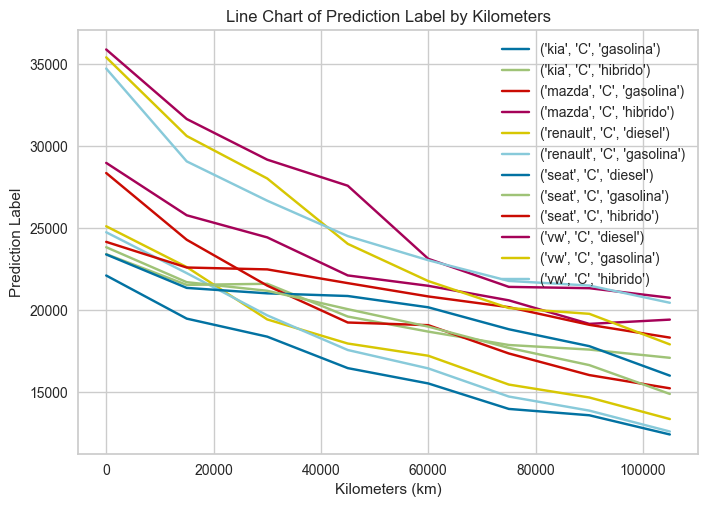

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your DataFrame with the necessary columns
# Grouping the data by 'brand', 'segment', and 'fuelType'
grouped = df_predictions.groupby(['brand', 'segment', 'fuelType'])

# Plotting each group on the same axes
fig, ax = plt.subplots()
for name, group in grouped:
    ax.plot(group['km'], group['prediction_label'], label=name)

ax.set_xlabel('Kilometers (km)')
ax.set_ylabel('Prediction Label')
ax.set_title('Line Chart of Prediction Label by Kilometers')
plt.legend()
plt.show()


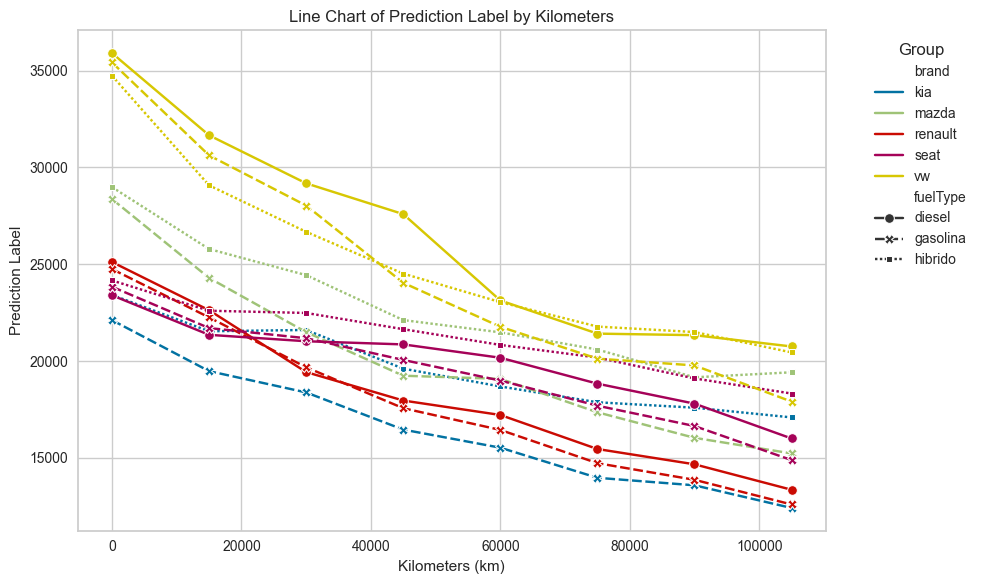

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your DataFrame with the necessary columns
# First, create a new column 'group' to store the combination of brand, segment, and fuelType
df_predictions['group'] = df_predictions[['brand', 'segment','body_type' , 'fuelType']].apply(lambda x: ', '.join(x), axis=1)

# Now, use Seaborn's lineplot function to create the line chart with dots
plt.figure(figsize=(10, 6))
line_chart = sns.lineplot(data=df_predictions, x='km', y='prediction_label', hue='brand', style='fuelType', markers=True)

# Enhancing the plot
line_chart.set_title('Line Chart of Prediction Label by Kilometers')
line_chart.set_xlabel('Kilometers (km)')
line_chart.set_ylabel('Prediction Label')
plt.legend(title='Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# Data analysis

In [ ]:
import pandas as pd

df_auto = pd.read_pickle('../data/processed/df_auto.pkl')

#df_auto.to_excel("df_auto.xlsx",  index=False)

df_auto.head()



,title,year,km,fuelTypeId,fuelType,isProfessional,mainProvince,hasWarranty,warrantyMonths,includesTaxes,...,cv,km_range,cv_range,age,price_calc,destination_folder,brand,model,segment,body_type
0,AUDI A3 Sportback Advanced 35 TDI 110kW S tron...,2023,148634.0,1,gasolina,false,Mu00E1laga,false,24,true,...,149.6,>100,120-150,1,15100,audi_a3,audi,a3,C,Hatchback
1,AUDI A3 Sportb 1.6 TDI clean 110CV S tr Advanc...,2016,166000.0,1,gasolina,false,Baleares,false,0,true,...,110.0,>100,100-120,8,14800,audi_a3,audi,a3,C,Hatchback
2,AUDI A3 Sportback 1.6 TDI clean d 110CV Advanc...,2015,79900.0,2,diesel,true,Madrid,true,0,true,...,110.0,70-80,100-120,9,21990,audi_a3,audi,a3,C,Hatchback
3,AUDI A3 Sedan 1.4 TFSI 125cv S line edition,2016,151000.0,1,gasolina,true,Cu00E1diz,true,12,true,...,125.0,>100,120-150,8,16900,audi_a3,audi,a3,C,Hatchback
4,AUDI A3 1.6 TDI 85kW 116CV Sportback 5p.,2017,114000.0,1,gasolina,true,Madrid,true,12,true,...,116.0,>100,100-120,7,17450,audi_a3,audi,a3,C,Hatchback


In [9]:
model = 'a3'

vehicle  = df_auto[df_auto['model']==model]

#vehicle = vehicle[vehicle['fuelType']=='diesel']


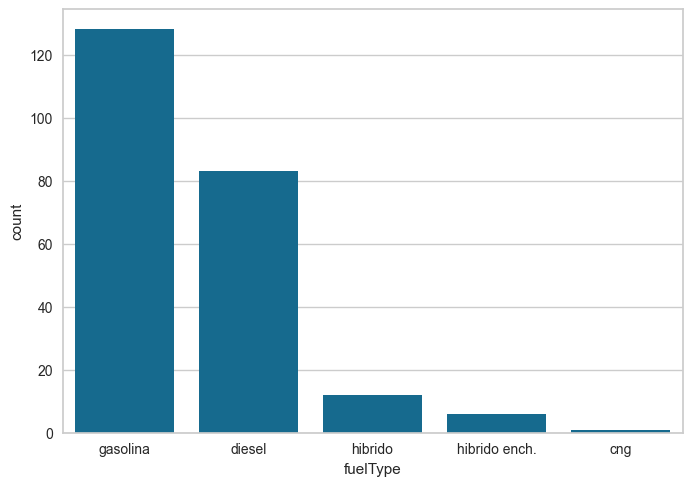

In [10]:
# Create a count plot
sns.countplot(x='fuelType', data=vehicle)

# Display the plot
plt.show()

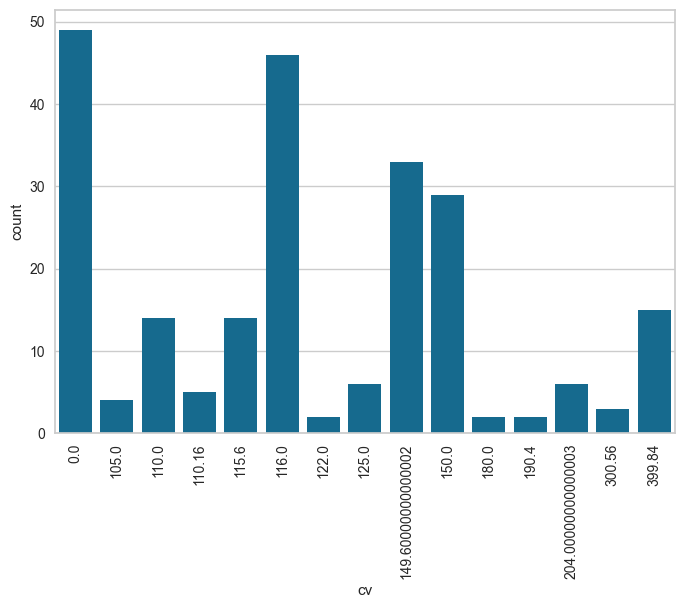

In [11]:
# Create a count plot
sns.countplot(x='cv', data=vehicle)

# Rotate X-axis labels to vertical
plt.xticks(rotation=90)

# Display the plot
plt.show()

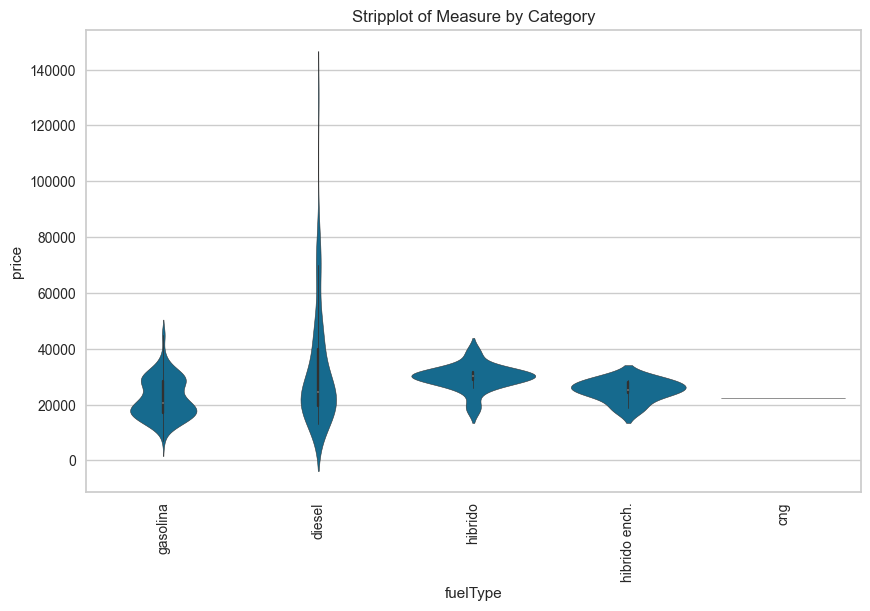

In [12]:
# Stripplot
plt.figure(figsize=(10, 6))
sns.violinplot(x='fuelType', y='price', data=vehicle)
plt.xticks(rotation=90)
plt.title('Stripplot of Measure by Category')
plt.show()

              year            km          price          kw          cv  \
count   230.000000  2.300000e+02     230.000000  153.000000  230.000000   
mean   2018.847826  9.029380e+04   26265.578261  120.856209  124.391652   
std       2.826631  8.630865e+04   14035.440953   61.899687   95.579980   
min    2013.000000  1.925000e+03    6980.000000   81.000000    0.000000   
25%    2017.000000  3.924500e+04   17900.000000   85.000000  110.000000   
50%    2019.000000  7.956200e+04   22725.000000  110.000000  116.000000   
75%    2021.000000  1.243170e+05   29900.000000  110.000000  149.600000   
max    2024.000000  1.090000e+06  129999.000000  294.000000  399.840000   

              age     price_calc  
count  230.000000     230.000000  
mean     5.152174   26265.578261  
std      2.826631   14035.440953  
min      0.000000    6980.000000  
25%      3.000000   17900.000000  
50%      5.000000   22725.000000  
75%      7.000000   29900.000000  
max     11.000000  129999.000000  


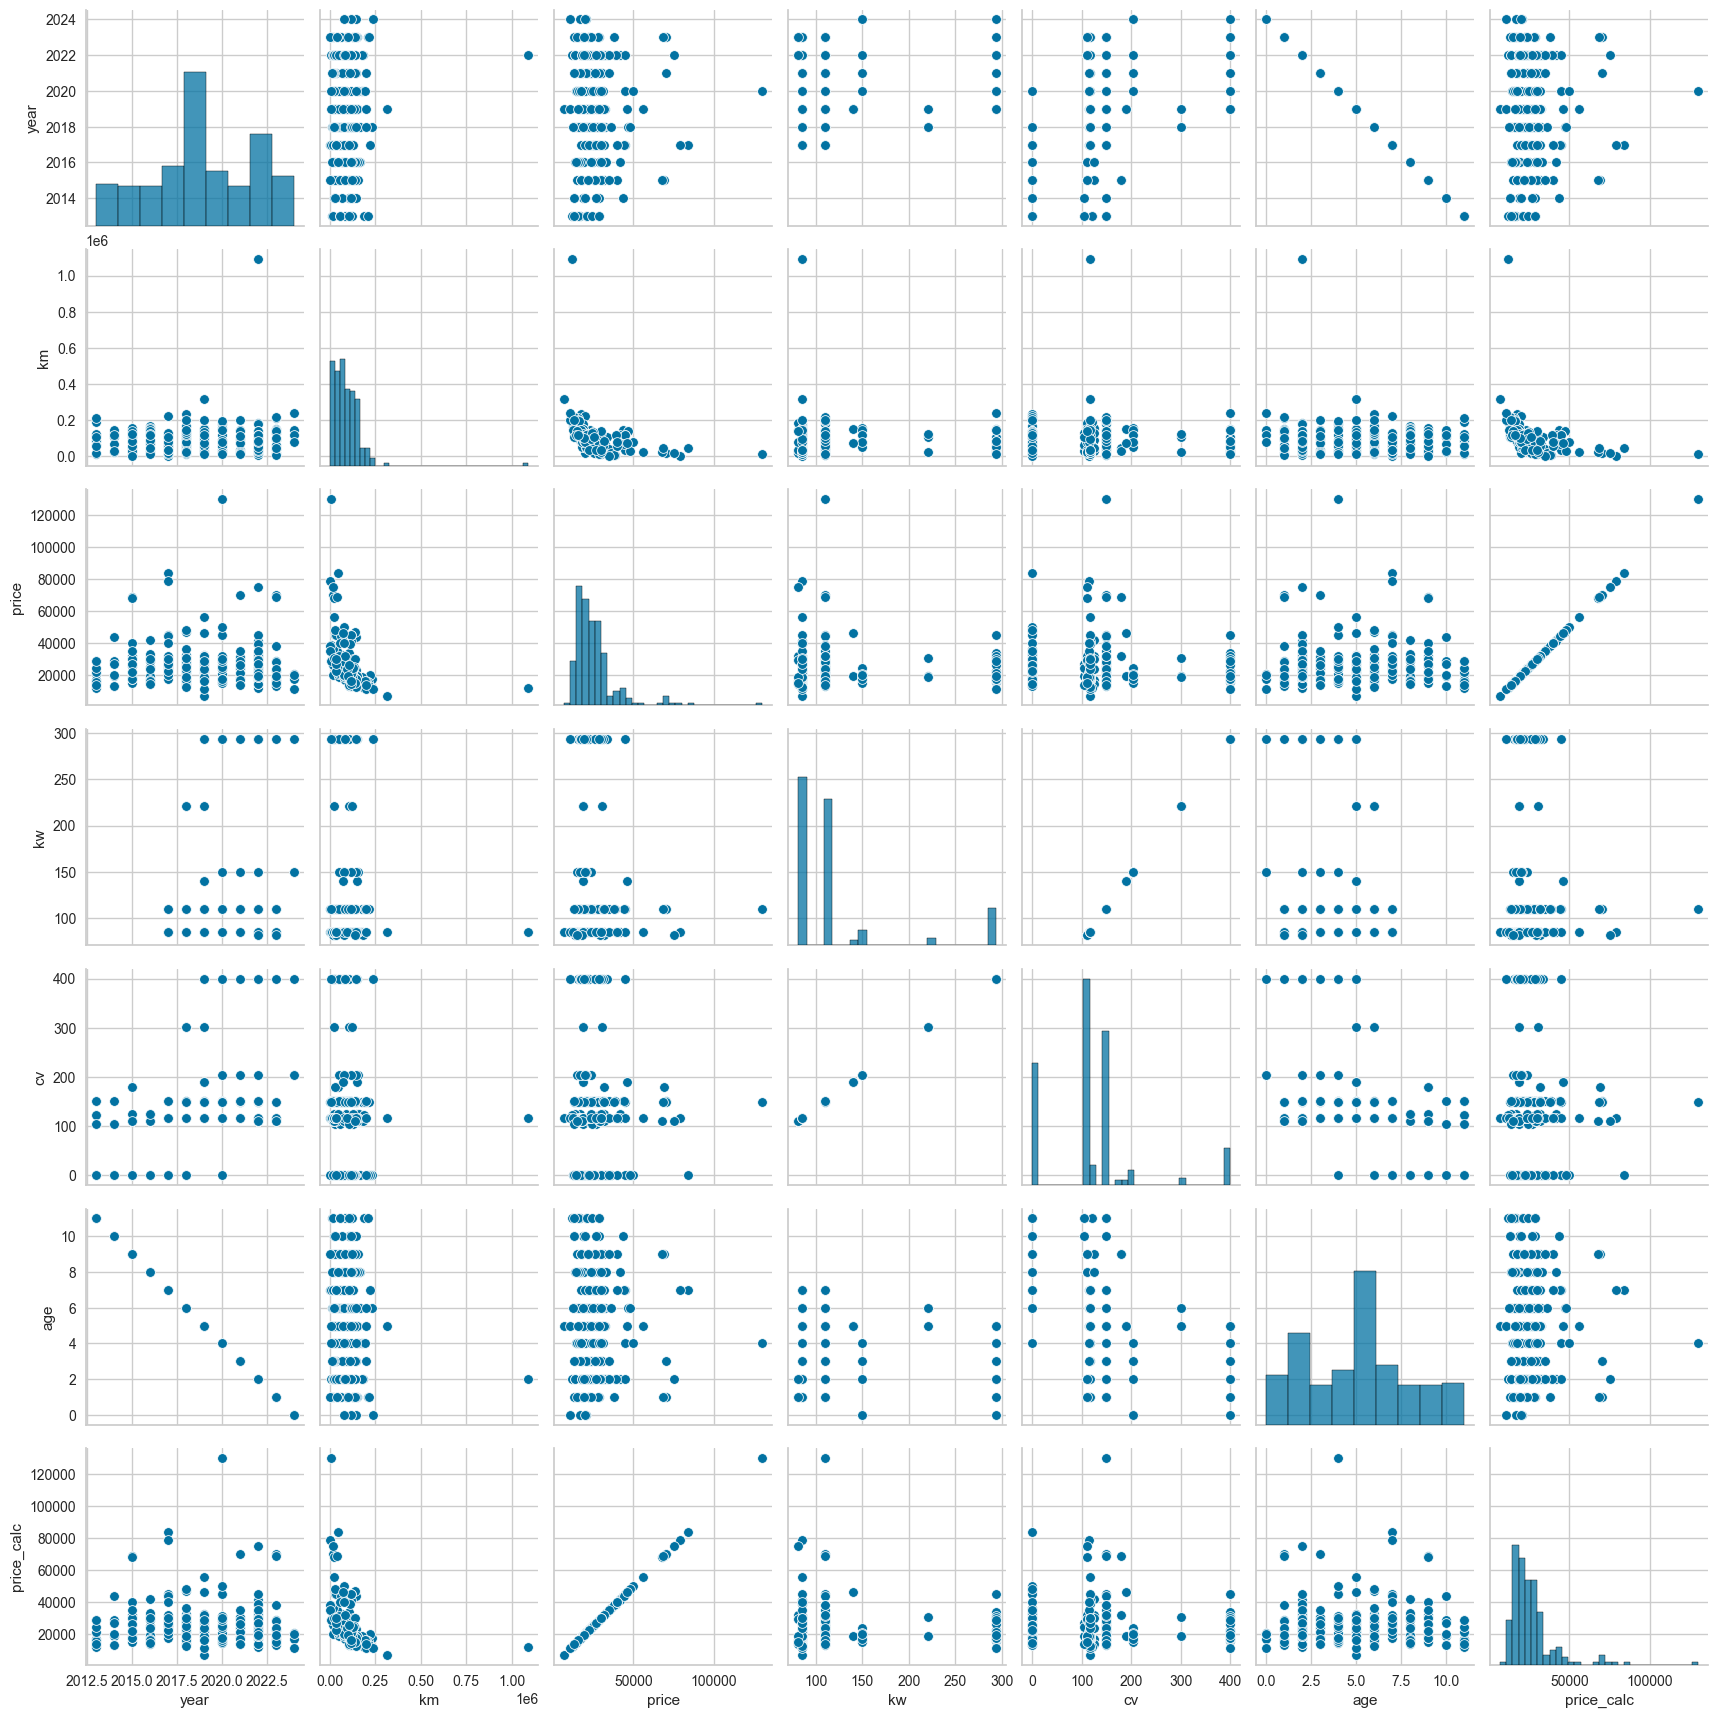

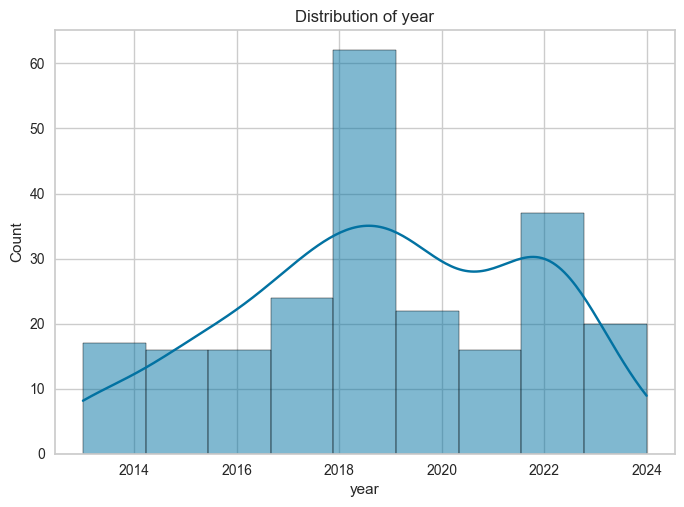

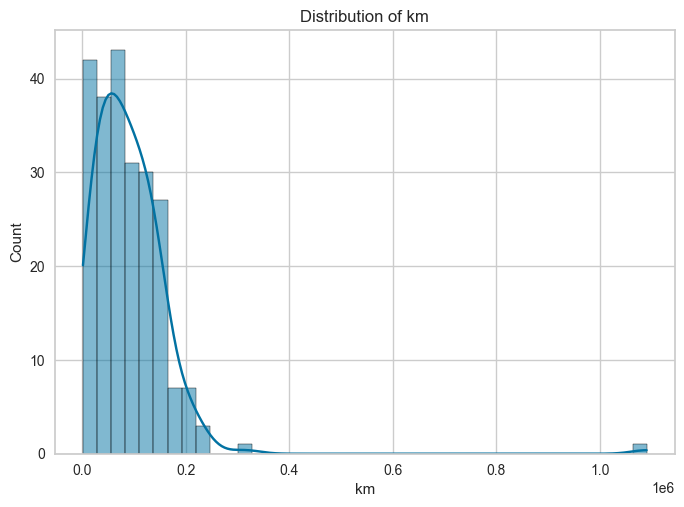

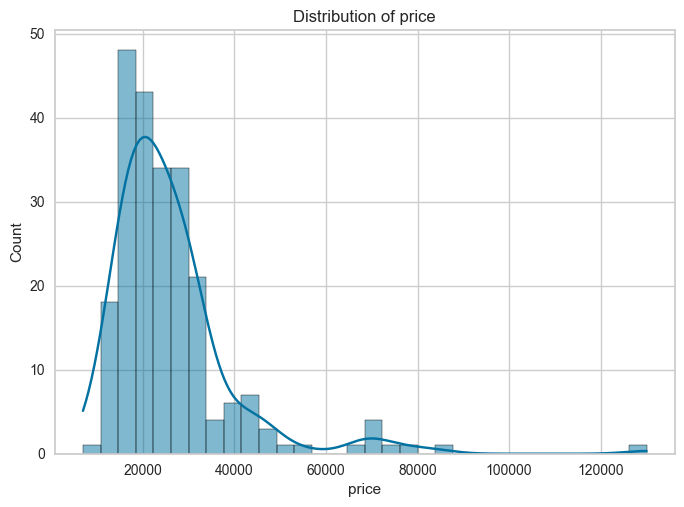

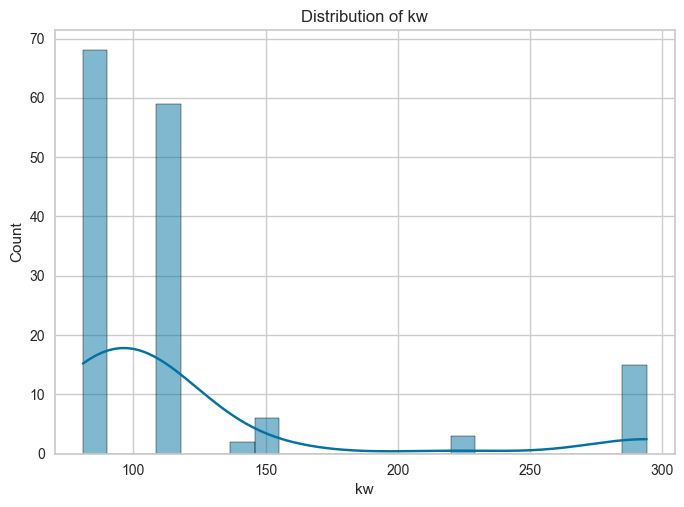

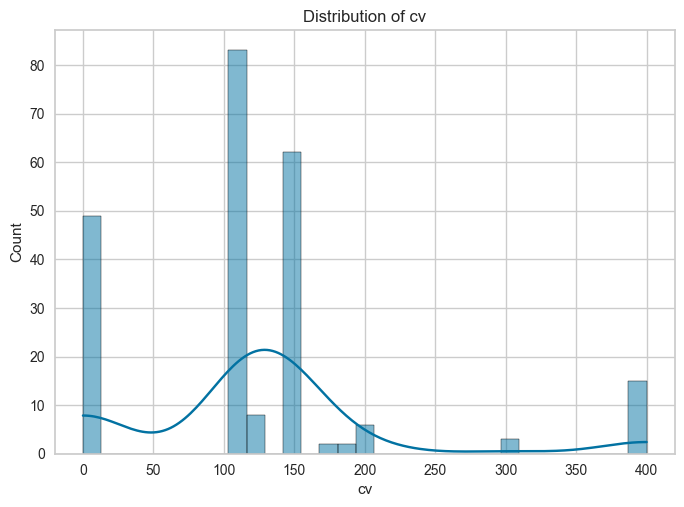

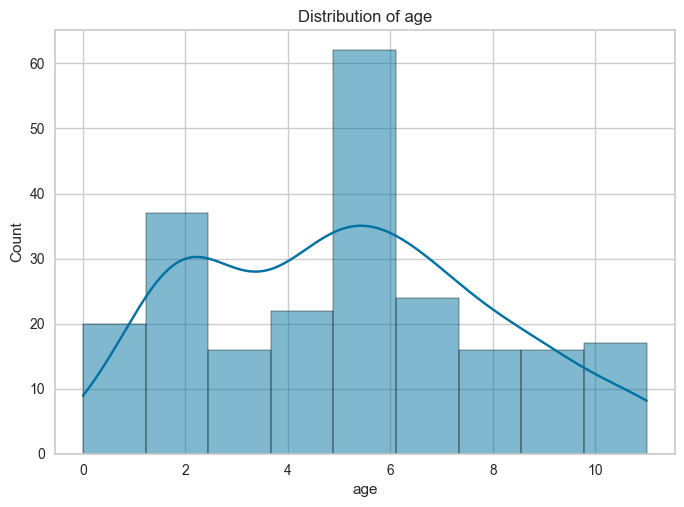

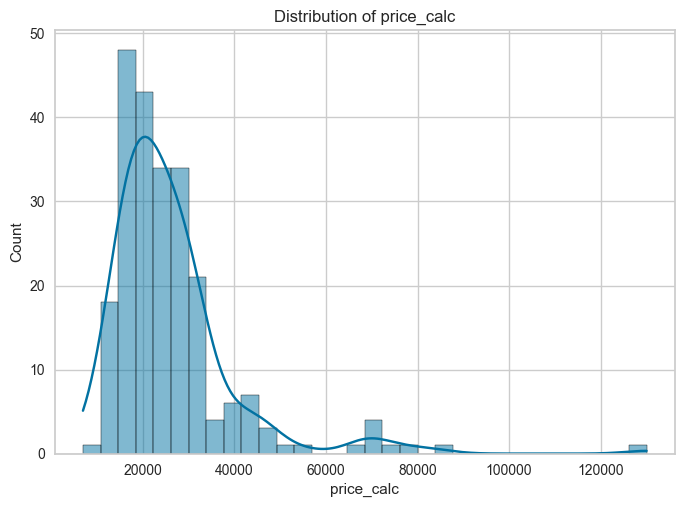

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# For numerical data, the .describe() method provides a quick statistical summary:
print(vehicle.describe())

# For visual analysis, Seaborn's pairplot function shows the distribution of single variables as well as relationships between two variables:
sns.pairplot(vehicle)
plt.show()

# For individual columns, you can use Seaborn's distplot or histplot:
for column in vehicle.select_dtypes(include=['float', 'int']).columns:
    sns.histplot(vehicle[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

In [14]:

#stonic  = df_auto[(df_auto['brand']=='kia') & (df_auto['model']=='stonic')]


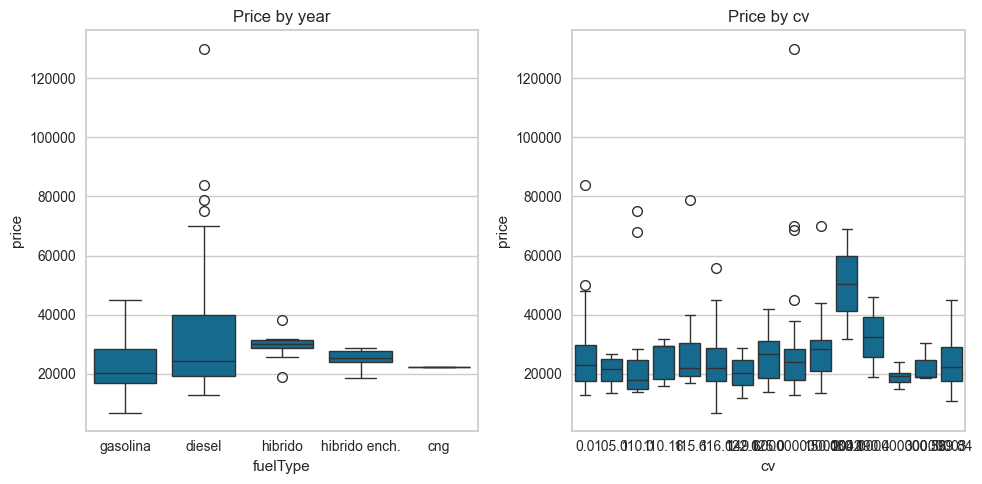

In [15]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot the price by year on the first subplot
sns.boxplot(data=vehicle, x="fuelType", y="price", ax=ax1)
ax1.set_title("Price by year")

# Plot the price by km_range on the second subplot
sns.boxplot(data=vehicle, x="cv", y="price", ax=ax2)
ax2.set_title("Price by cv")

# Adjust the layout
plt.tight_layout()
plt.show()